In [1]:
import schnetpack as spk
import torch
import schnetpack.nn 
import schnetpack.data
import math

from schnetpack.datasets import QM9

In [2]:

# Download QM9 dataset 
qm9data = QM9('./qm9.db', download=True, remove_uncharacterized=True)

#idx is the index of the dataset
idx = 2

# load data for molecule
at, props = qm9data.get_properties(idx)

#print properties
print(props['_atomic_numbers'])
print(props['_positions'])



tensor([8, 1, 1])
tensor([[-5.6249e-02,  3.5458e-02,  7.2602e-04],
        [ 4.2878e-02, -9.2151e-01, -5.3409e-03],
        [ 8.4990e-01,  3.5871e-01, -6.1824e-03]])


C:\Users\aelsamma\Anaconda3\lib\site-packages\schnetpack\data\atoms.py:327: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  properties[pname] = torch.FloatTensor(prop)
C:\Users\aelsamma\Anaconda3\lib\site-packages\ase\atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',


In [20]:

model = torch.load("../../../data/trained_models/qm9_i6_30f_10000_5000/best_model", map_location=torch.device('cpu'))


# Load split file 
train, val, test = spk.data.train_test_split(qm9data, split_file='../../../data/trained_models/qm9_i6_30f_10000_5000/split.npz')


device = 'cpu'

calculator = spk.interfaces.SpkCalculator(model=model, device=device, energy=QM9.U0)
converter = spk.data.AtomsConverter(device=device)

# set calculator on molecule
at.set_calculator(calculator)

# convert qm9 data to machine-readable form
inputs = converter(at)


pred = model(inputs)

print('Prediction:', pred[QM9.U0].detach().cpu().numpy()[0,0])
print('Keys:', list(inputs.keys()))
print('Truth:', props[QM9.U0].cpu().numpy()[0])

from schnetpack.nn.acsf import diff
from schnetpack.nn.acsf import off
from schnetpack.nn.acsf import wid
from schnetpack.nn.neighbors import distances



coeff = -0.5/torch.pow(wid,2)
gauss = torch.exp(coeff*torch.pow(diff,2))

print('DISTANCES')
print(distances)
print('WIDTH')
print(wid)
print('DIFF')
print(diff)
print('GAUSS')
print(gauss)


Prediction: -2079.822
Keys: ['_atomic_numbers', '_positions', '_cell', '_neighbors', '_cell_offset', '_atom_mask', '_neighbor_mask', 'representation']
Truth: -2079.078
DISTANCES
tensor([[[0.9621, 0.9621],
         [0.9621, 1.5134],
         [0.9621, 1.5134]]])
WIDTH
tensor([0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105,
        0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105, 0.2105,
        0.2105, 0.2105])
DIFF
tensor([[[[ 0.9621,  0.7516,  0.5411,  0.3305,  0.1200, -0.0905, -0.3011,
           -0.5116, -0.7221, -0.9326, -1.1432, -1.3537, -1.5642, -1.7747,
           -1.9853, -2.1958, -2.4063, -2.6168, -2.8274, -3.0379],
          [ 0.9621,  0.7516,  0.5411,  0.3305,  0.1200, -0.0905, -0.3011,
           -0.5116, -0.7221, -0.9326, -1.1432, -1.3537, -1.5642, -1.7747,
           -1.9853, -2.1958, -2.4063, -2.6168, -2.8274, -3.0379]],

         [[ 0.9621,  0.7516,  0.5411,  0.3305,  0.1200, -0.0905, -0.3011,
           -0.5116, -0.7221, -0.9326, -

C:\Users\aelsamma\Anaconda3\lib\site-packages\ase\atoms.py:967: VisibleDeprecationWarning: Use get_global_number_of_atoms() instead
  warnings.warn('Use get_global_number_of_atoms() instead',


In [26]:

print(sum(gauss[0][0][0]))

tensor(2.5066)


0.5276452518098256


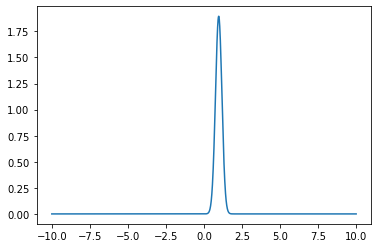

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import math

x_axis = np.arange(-10,10,0.01)
mean = 0.9621
sd = 0.2105

normal = math.sqrt(2*math.pi*(sd)**2)
print(normal)


plt.plot(x_axis,norm.pdf(x_axis,mean,sd))

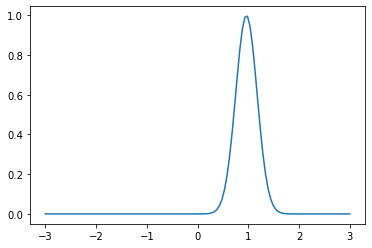

In [32]:
from matplotlib import pyplot as plt
import numpy as np

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x_values = np.linspace(-3, 3, 120)
for mu, sig in [((0.9621,0.2105))]:
    plt.plot(x_values, gaussian(x_values, mu, sig))

plt.show()